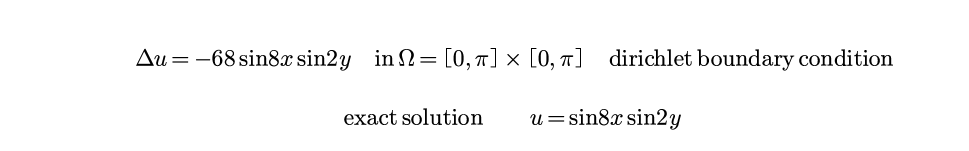

In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict
import numpy as np
# %matplotlib widget
from matplotlib import pyplot as plt
from numpy import matrix as mat
from torch.nn.modules import loss
from functorch import make_functional, vmap, grad, jacrev, hessian
import time
from matplotlib.ticker import FuncFormatter
pi=np.pi

ModuleNotFoundError: No module named 'torch'

In [2]:
torch.cuda.empty_cache()

In [4]:
import plot_l2error
import pinn_lm
import importlib
importlib.reload(plot_l2error)
importlib.reload(pinn_lm)
pi=np.pi
pinns_ran=pinn_lm.PINN_LM(0)

model # of parameters 5300


In [5]:
for i in range(10):
                pinns_ran.new_sampling(i)
                pinns_ran.adam_step(500) 

/home/zqh/anaconda3/envs/env-zqh/lib/python3.12/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/zqh/anaconda3/envs/env-zqh/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/home/zqh/lm_method/possion/pinn_lm.py:533: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.make_functional` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.fun

step: 0 loss: tensor(1033.1322, device='cuda:0', grad_fn=<DivBackward0>)
step: 10 loss: tensor(1027.3697, device='cuda:0', grad_fn=<DivBackward0>)
step: 20 loss: tensor(1015.0624, device='cuda:0', grad_fn=<DivBackward0>)
step: 30 loss: tensor(963.7931, device='cuda:0', grad_fn=<DivBackward0>)
step: 40 loss: tensor(845.9240, device='cuda:0', grad_fn=<DivBackward0>)
step: 50 loss: tensor(814.0525, device='cuda:0', grad_fn=<DivBackward0>)
step: 60 loss: tensor(785.1775, device='cuda:0', grad_fn=<DivBackward0>)
step: 70 loss: tensor(747.4897, device='cuda:0', grad_fn=<DivBackward0>)
step: 80 loss: tensor(708.3443, device='cuda:0', grad_fn=<DivBackward0>)
step: 90 loss: tensor(668.7285, device='cuda:0', grad_fn=<DivBackward0>)
step: 100 loss: tensor(636.0928, device='cuda:0', grad_fn=<DivBackward0>)
step: 110 loss: tensor(611.3130, device='cuda:0', grad_fn=<DivBackward0>)
step: 120 loss: tensor(593.3711, device='cuda:0', grad_fn=<DivBackward0>)
step: 130 loss: tensor(574.0710, device='cuda:

In [9]:
importlib.reload(pinn_lm)
pinns_modify=pinn_lm.PINN_LM(1)
pinns_modify.model=pinns_ran.model.to("cuda:1")
avg_time=np.zeros(2)
error=np.zeros(2)
loss_dict = {}

model # of parameters 5300


begin a new iteration
Zhuyi :  5300
reject move
steps 20 accept move Loss = 0.1488378879008811 Loss new = 0.0020001062255278444
Elapsed: 102.0ms
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
steps 30 accept move Loss = 8.92088637752447e-05 Loss new = 8.589677743994844e-05
Elapsed: 127.7ms
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
steps 40 accept move Loss = 5.379624517025257e-05 Loss new = 4.7862834001319316e-05
Elapsed: 133.5ms
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
steps 50 accept move Loss = 3.27712857262425e-05 Loss new = 3.0235723610496255e-05
Elapsed: 129.8ms
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
steps 60 accept move Loss = 2.279869338689323e-05 Loss new = 2.1430258879904072e-05
Elapsed: 125.7ms
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
steps 

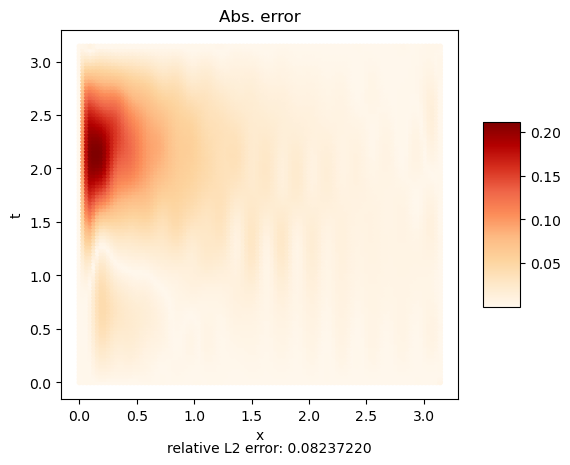

In [8]:
# %matplotlib inline
for i in range(10):
                pinns_modify.new_sampling(i)
                pinns_modify.LM(5300,100,True) 
avg_time[0]=pinns_modify.avg_time/100
error[0]=plot_l2error.plot_model_error(pinns_modify.model, (0, pi), (0, pi), device='cuda:1')
loss_dict[f"loss modify"]=pinns_modify.loss_record


error 0.06713284090292929


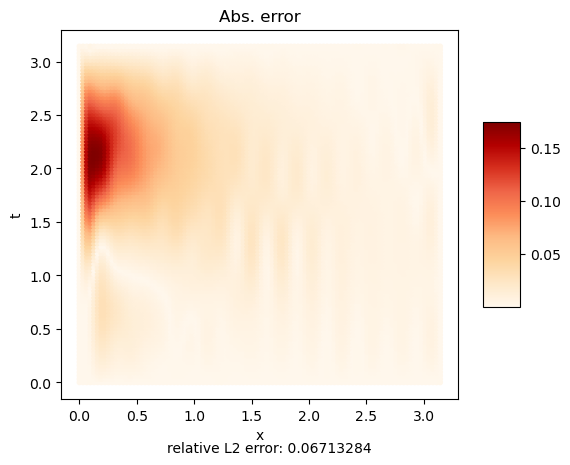

In [11]:
pinns_general=pinn_lm.PINN_LM(2)
pinns_general.model=pinns_ran.model.to("cuda:2")
for i in range(10):
                pinns_general.new_sampling(i)
                pinns_general.LM(5300,100,False) 
avg_time[1]=pinns_general.avg_time/100
error[1]=plot_l2error.plot_model_error(pinns_general.model, (0, pi), (0, pi), device='cuda:2')
loss_dict[f"loss general"]=pinns_general.loss_record

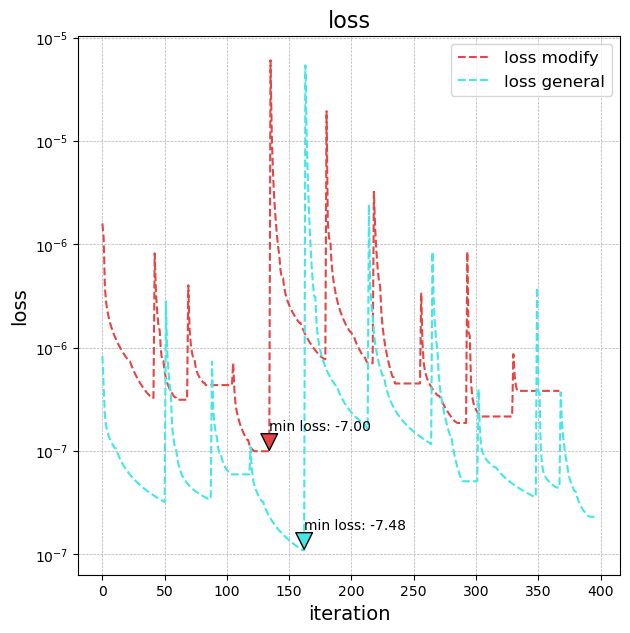

In [36]:
import plot_loss
import importlib
importlib.reload(plot_loss)

loss=[]
label=[]
i=0
true=True
for key, value in loss_dict.items():
    i=i+1
    if true:
        loss.append(value)
        label.append(key)
random_colors = plot_loss.generate_distinguishable_colors(len(loss))
plot_loss.plot_losses(loss,label,random_colors,'--')

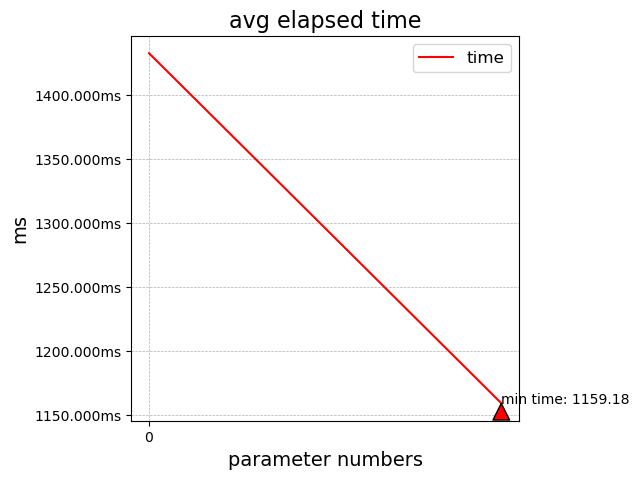

In [37]:
import plot_time
import importlib
importlib.reload(plot_time)
avg_time=avg_time[avg_time!=0]
plot_time.plot_time(avg_time,np.arange(len(avg_time)),'r','-')

## 废弃

In [4]:
import plot_l2error
import pinn_lm
import importlib
importlib.reload(plot_l2error)
importlib.reload(pinn_lm)
# 创建一个空字典来存储损失数组
pi=np.pi
cate_num=1
loss_dict = {}
vic_time=np.zeros(cate_num)
torch.cuda.empty_cache() 
avg_time=np.zeros(cate_num)
error=np.zeros(cate_num)
for j in range(cate_num):
    pinns_ran=pinn_lm.PINN_LM()
    pinns_ran.new_sampling(10)
    %matplotlib agg
    if j<3 :
        for i in range(20):
                pinns_ran.new_sampling(i)
                pinns_ran.LM(5300,100,True) 
                # e=plot_l2error.plot_model_error(pinns_ran.model, (-1, 1), (0, 1), device='cuda')  
                # if float(e)<1e-4 :
                #     vic_time[j]=i*10
                #     break        
    else:
        for i in range(20): 
                pinns_ran.LM(5300,510,True)
                # e=plot_l2error.plot_model_error(pinns_ran.model, (-1, 1), (0, 1), device='cuda')
                # if float(e)<1e-4 :
                #     vic_time[j]=i*10
                #     break
    %matplotlib inline
    avg_time[j]=pinns_ran.avg_time
    error[j]=plot_l2error.plot_model_error(pinns_ran.model, (0, pi), (0, pi), device='cuda')
    if j<3:
        loss_dict[f"loss {j} modify"]=pinns_ran.loss_record
    else:
        loss_dict[f"loss {j} general"]=pinns_ran.loss_record
x_axis=np.arange(20,920+45,45)

model # of parameters 5300
begin a new iteration
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
steps 10 accept move Loss = 843.7124317517291 Loss new = 842.9246546279647
Elapsed: 910.4ms
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
steps 20 accept move Loss = 839.0900688210991 Loss new = 836.3756359024161
Elapsed: 901.7ms
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
reject move
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
reject move
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
Zhuyi :  5300
reject move
Zhuyi :  5300
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "f:\Anaconda3\envs\my-env\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Windows\Temp\ipykernel_5316\3003126785.py", line 21, in <module>
    pinns_ran.LM(5300,100,True)
  File "d:\SUSTUDY\LM_method\lm-method\possion\pinn_lm.py", line 306, in LM
    A_opt = torch.matmul(J_opt.t(), J_opt)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
torch.cuda.OutOfMemoryError: CUDA out of memory. Tried to allocate 216.00 MiB. GPU 0 has a total capacty of 6.00 GiB of which 0 bytes is free. Of the allocated memory 12.11 GiB is allocated by PyTorch, and 114.99 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  F

In [8]:
for i in range(1):
                pinns_ran.new_sampling(80*i)
                pinns_ran.LM(920,300,True) 

begin a new iteration
Zhuyi :  920
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
reject move
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
reject move
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
reject move
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
reject move
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
reject move
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
steps 60 accept move Loss = 1.1456991009455848e-05 Loss new = 1.1454030426621682e-05
Elapsed: 201.6ms
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
reject move
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
reject move
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
reject move
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
reject move
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
Zhuyi :  184
reject move
Zh

In [7]:
plot_l2error.plot_model_error(pinns_ran.model, (0, pi), (0, pi), device='cuda')

error 0.13091722960558344


d:\SUSTUDY\LM_method\lm-method\possion\plot_l2error.py:49: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


'0.13091723'

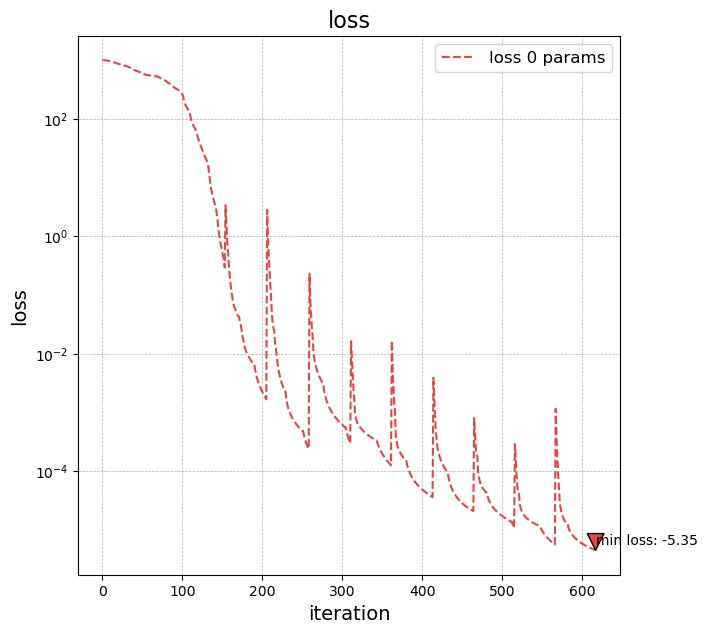

In [7]:
import plot_loss
import importlib
importlib.reload(plot_loss)

loss=[]
label=[]
i=0
true=True
for key, value in loss_dict.items():
    i=i+1
    if true:
        loss.append(value)
        label.append(key)
random_colors = plot_loss.generate_distinguishable_colors(len(loss))
plot_loss.plot_losses(loss,label,random_colors,'--')

error 0.003905910989482056


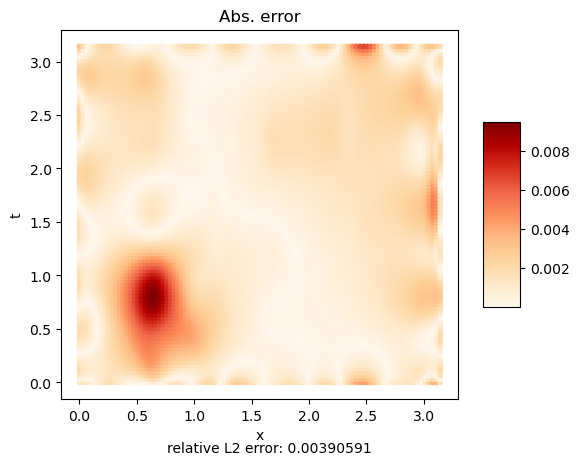

'0.00390591'

In [17]:
%matplotlib inline
plot_l2error.plot_model_error(pinns_ran.model, (0, pi), (0, pi), device='cuda')

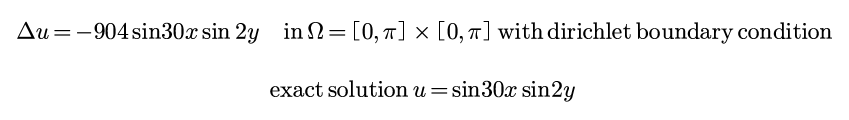

model # of parameters 1980
begin a new iteration
steps  1 accept move
Loss = 988.070148749573 Loss new= 988.0294552402553
Elapsed: 0.0ms
steps  2 accept move
Loss = 988.0294552402553 Loss new= 987.8328959781257
Elapsed: 1017.2ms
steps  3 accept move
Loss = 987.8328959781257 Loss new= 987.0192170881818
Elapsed: 1024.2ms
steps  4 accept move
Loss = 987.0192170881818 Loss new= 984.8443828814521
Elapsed: 1047.0ms
steps  7 accept move
Loss = 984.8443828814521 Loss new= 983.8114688484121
Elapsed: 1019.1ms
steps  9 accept move
Loss = 983.8114688484121 Loss new= 982.4552843405078
Elapsed: 964.3ms
reject move
steps  11 accept move
Loss = 982.4552843405078 Loss new= 980.4860486032977
Elapsed: 984.9ms
steps  13 accept move
Loss = 980.4860486032977 Loss new= 977.417202221709
Elapsed: 1015.7ms
steps  15 accept move
Loss = 977.417202221709 Loss new= 972.4488936413372
Elapsed: 971.8ms
steps  17 accept move
Loss = 972.4488936413372 Loss new= 964.4818070903256
Elapsed: 986.8ms
steps  19 accept move
Los

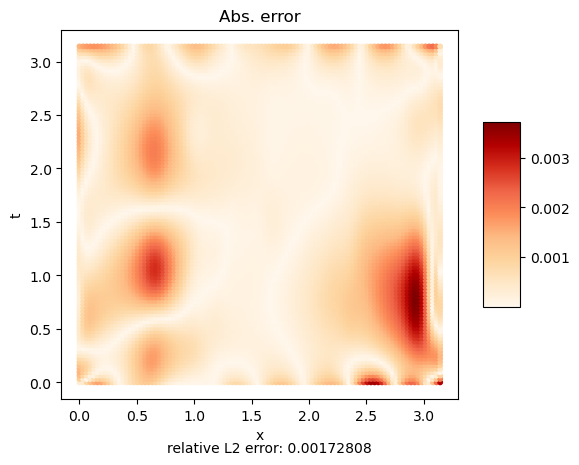

In [4]:
import plot_l2error
import possion30
import importlib
importlib.reload(plot_l2error)
importlib.reload(possion30)
# 创建一个空字典来存储损失数组
pi=np.pi
cate_num=1
loss_dict = {}
vic_time=np.zeros(cate_num)
torch.cuda.empty_cache() 
avg_time=np.zeros(cate_num)
error=np.zeros(cate_num)
for j in range(cate_num):
    pinns_ran=pinn_lm.PINN_LM()
    pinns_ran.new_sampling(10)
    %matplotlib agg
    if j<3 :
        for i in range(12):
                pinns_ran.new_sampling(i)
                pinns_ran.LM(1980,100,True) 

                # e=plot_l2error.plot_model_error(pinns_ran.model, (-1, 1), (0, 1), device='cuda')  
                # if float(e)<1e-4 :
                #     vic_time[j]=i*10
                #     break        
    else:
        for i in range(3): 
                pinns_ran.LM(920,500,True)
                # e=plot_l2error.plot_model_error(pinns_ran.model, (-1, 1), (0, 1), device='cuda')
                # if float(e)<1e-4 :
                #     vic_time[j]=i*10
                #     break
    %matplotlib inline
    avg_time[j]=pinns_ran.avg_time/pinns_ran.time_iter
    error[j]=plot_l2error.plot_model_error(pinns_ran.model, (0, pi), (0, pi), device='cuda')
    if j<3:
        loss_dict[f"loss {j} params"]=pinns_ran.loss_record
    else:
        loss_dict[f"loss {j} big params"]=pinns_ran.loss_record
x_axis=np.arange(20,920+45,45)